In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
from copy import deepcopy as dc
import random
from skimage import measure
import geometry_bspline as bsp_geom
import NeuralImplicit as NI
import geometry_visualisation as geom_vis
import geometry_definitions as geom_defs
import network_defs as mod
import SDF
torch.set_default_dtype(torch.float64)

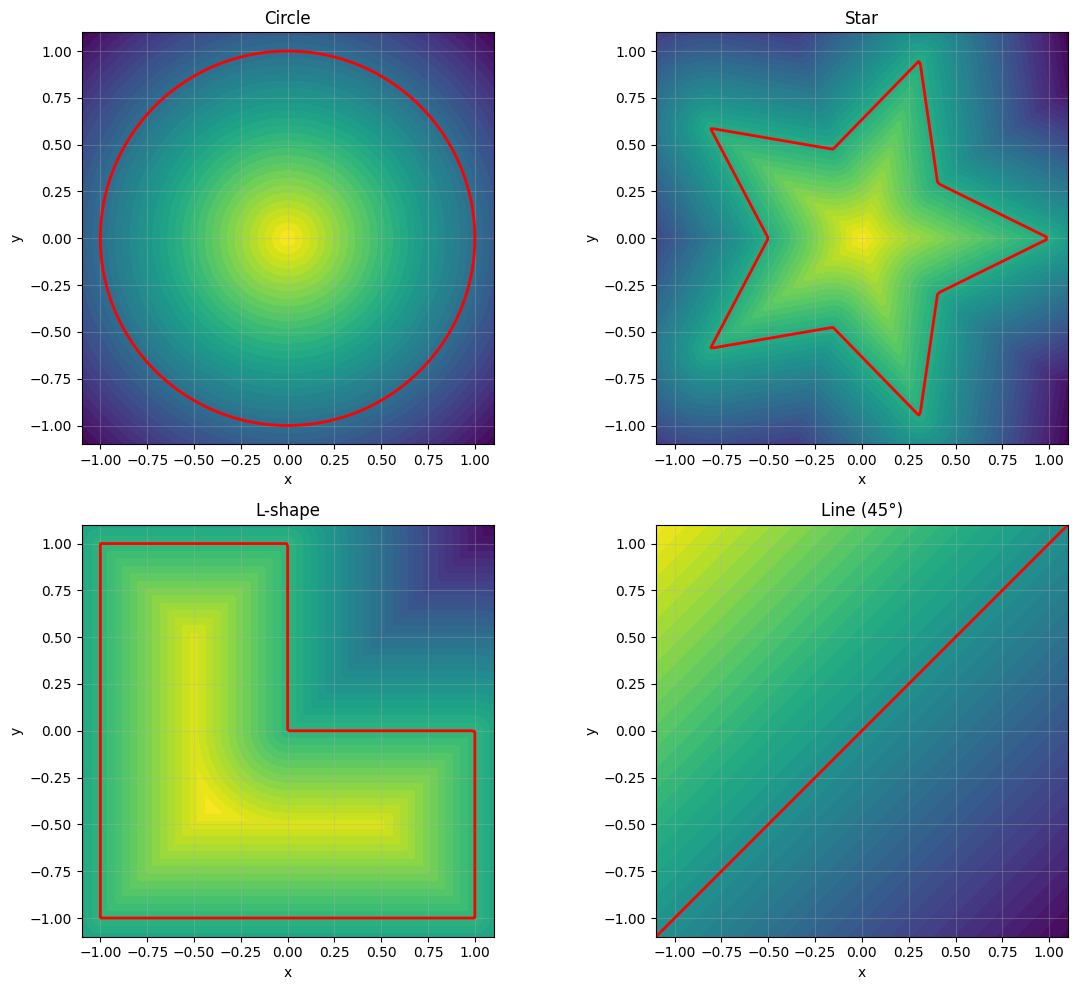

(<Figure size 1200x1000 with 4 Axes>,
 array([<Axes: title={'center': 'Circle'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Star'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'L-shape'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Line (45°)'}, xlabel='x', ylabel='y'>],
       dtype=object))

In [2]:
SDF.visualize_all_standard_testcases(N=150, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

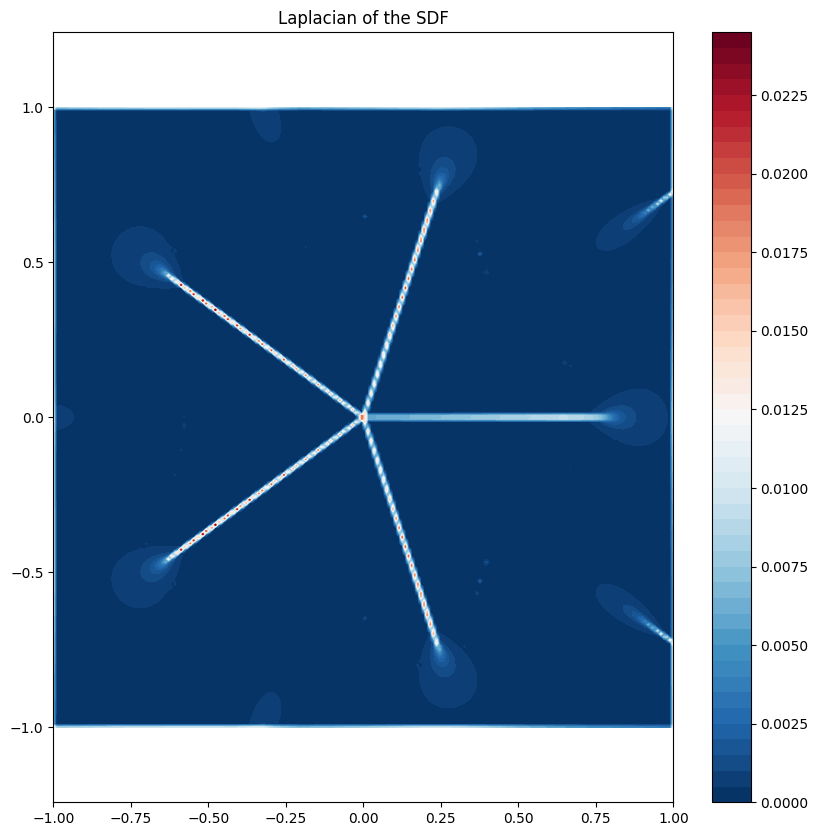

In [4]:
geom_vis.plot_laplacian_of_bspline_sdf(control_points=rounded_star_cp, degree=2, num_samples=6000)

In [4]:

architecture = [2,256,256,256,1]
model1 = mod.Siren(architecture, outermost_linear=True, first_omega_0=60, hidden_omega_0=60)
model2 = mod.PE_Relu(architecture=[2,256,256,256,256,1], num_freqs=5)
model3 = mod.NeuralNetwork(architecture=[2,256,256,256,256,1])
model4 = mod.SIRELU(architecture=[2,256,256,256,256,1],first_omega_0=60)

print(f"number of parameters: {sum(p.numel() for p in model1.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model2.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model3.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model4.parameters() if p.requires_grad)}")

model1.optimizer = torch.optim.Adam(lr=1e-5, params=model1.parameters())
model2.optimizer = torch.optim.Adam(lr=1e-5, params=model2.parameters())
model3.optimizer = torch.optim.Adam(lr=1e-5, params=model3.parameters())
model4.optimizer = torch.optim.Adam(lr=1e-5, params=model4.parameters())


model1.lr_scheduler = torch.optim.lr_scheduler.StepLR(model1.optimizer, step_size=1000, gamma=0.8)
model2.lr_scheduler = torch.optim.lr_scheduler.StepLR(model2.optimizer, step_size=1000, gamma=0.8)
model3.lr_scheduler = torch.optim.lr_scheduler.StepLR(model3.optimizer, step_size=1000, gamma=0.8)
model4.lr_scheduler = torch.optim.lr_scheduler.StepLR(model4.optimizer, step_size=1000, gamma=0.8)


#model1.lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(model1.optimizer, T_max=10000, eta_min=1e-7)
#model2.lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(model2.optimizer, T_max=10000, eta_min=1e-7)
#model3.lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(model3.optimizer, T_max=10000, eta_min=1e-7)
#model4.lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(model4.optimizer, T_max=10000, eta_min=1e-7)

# SIREN 198k parameters - Adam - 1e-6 
# ReLU 189k parameters - Adam - 1e-6

number of parameters: 198401
number of parameters: 203521
number of parameters: 198401
number of parameters: 264193


In [2]:
architecture = [2,256,256,256,1]
model1 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)
model2 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)
model3 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)
model4 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)
model5 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)
model6 = mod.Siren(architecture, outermost_linear=True, first_omega_0=100, hidden_omega_0=120)
print(f"number of parameters: {sum(p.numel() for p in model1.parameters() if p.requires_grad)}")

model1.optimizer = torch.optim.Adam(lr=1e-4, params=model1.parameters())
model2.optimizer = torch.optim.Adam(lr=1e-4, params=model2.parameters())
model3.optimizer = torch.optim.Adam(lr=1e-4, params=model3.parameters())
model4.optimizer = torch.optim.Adam(lr=1e-4, params=model4.parameters())
model5.optimizer = torch.optim.Adam(lr=1e-4, params=model5.parameters())
model6.optimizer = torch.optim.Adam(lr=1e-4, params=model6.parameters())


model1.lr_scheduler = torch.optim.lr_scheduler.StepLR(model1.optimizer, step_size=1000, gamma=0.8)
model2.lr_scheduler = torch.optim.lr_scheduler.StepLR(model2.optimizer, step_size=1000, gamma=0.8)
model3.lr_scheduler = torch.optim.lr_scheduler.StepLR(model3.optimizer, step_size=1000, gamma=0.8)
model4.lr_scheduler = torch.optim.lr_scheduler.StepLR(model4.optimizer, step_size=1000, gamma=0.8)
model5.lr_scheduler = torch.optim.lr_scheduler.StepLR(model5.optimizer, step_size=1000, gamma=0.8)
model6.lr_scheduler = torch.optim.lr_scheduler.StepLR(model6.optimizer, step_size=1000, gamma=0.8)
print("Comparing different SIREN hyperparameters")
model_list = [model1, model2, model3]


number of parameters: 198401
Comparing different SIREN hyperparameters


In [44]:
architecture = [2,256,256,256, 256,1]
model1 = mod.PE_Relu(architecture, num_freqs=10)
model2 = mod.PE_Relu(architecture, num_freqs=10)
model3 = mod.PE_Relu(architecture, num_freqs=10)
model4 = mod.PE_Relu(architecture, num_freqs=10)
model5 = mod.PE_Relu(architecture, num_freqs=10)
model6 = mod.PE_Relu(architecture, num_freqs=10)
print(f"number of parameters: {sum(p.numel() for p in model1.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model2.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model3.parameters() if p.requires_grad)}")

model1.optimizer = torch.optim.Adam(lr=1e-3, params=model1.parameters())
model2.optimizer = torch.optim.Adam(lr=1e-3, params=model2.parameters())
model3.optimizer = torch.optim.Adam(lr=1e-3, params=model3.parameters())
model4.optimizer = torch.optim.Adam(lr=1e-3, params=model4.parameters())
model5.optimizer = torch.optim.Adam(lr=1e-3, params=model5.parameters())
model6.optimizer = torch.optim.Adam(lr=1e-3, params=model6.parameters())


model1.lr_scheduler = torch.optim.lr_scheduler.StepLR(model1.optimizer, step_size=1000, gamma=0.8)
model2.lr_scheduler = torch.optim.lr_scheduler.StepLR(model2.optimizer, step_size=1000, gamma=0.8)
model3.lr_scheduler = torch.optim.lr_scheduler.StepLR(model3.optimizer, step_size=1000, gamma=0.8)
model4.lr_scheduler = torch.optim.lr_scheduler.StepLR(model4.optimizer, step_size=1000, gamma=0.8)
model5.lr_scheduler = torch.optim.lr_scheduler.StepLR(model5.optimizer, step_size=1000, gamma=0.8)
model6.lr_scheduler = torch.optim.lr_scheduler.StepLR(model6.optimizer, step_size=1000, gamma=0.8)
print("Comparing different SIREN hyperparameters")
model_list = [model1,
              model2,
              model3,
              model4,
              model5,
              model6]

number of parameters: 208641
number of parameters: 208641
number of parameters: 208641
Comparing different SIREN hyperparameters


In [2]:
architecture = [2,256,256,256, 256,1]
model1 = mod.NeuralNetwork(architecture)
model2 = mod.NeuralNetwork(architecture)
model3 = mod.NeuralNetwork(architecture)
model4 = mod.NeuralNetwork(architecture)
model5 = mod.NeuralNetwork(architecture)
model6 = mod.NeuralNetwork(architecture)
print(f"number of parameters: {sum(p.numel() for p in model1.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model2.parameters() if p.requires_grad)}")
print(f"number of parameters: {sum(p.numel() for p in model3.parameters() if p.requires_grad)}")

model1.optimizer = torch.optim.Adam(lr=1e-3, params=model1.parameters())
model2.optimizer = torch.optim.Adam(lr=1e-3, params=model2.parameters())
model3.optimizer = torch.optim.Adam(lr=1e-3, params=model3.parameters())
model4.optimizer = torch.optim.Adam(lr=1e-3, params=model4.parameters())
model5.optimizer = torch.optim.Adam(lr=1e-3, params=model5.parameters())
model6.optimizer = torch.optim.Adam(lr=1e-3, params=model6.parameters())


model1.lr_scheduler = torch.optim.lr_scheduler.StepLR(model1.optimizer, step_size=2000, gamma=0.8)
model2.lr_scheduler = torch.optim.lr_scheduler.StepLR(model2.optimizer, step_size=2000, gamma=0.8)
model3.lr_scheduler = torch.optim.lr_scheduler.StepLR(model3.optimizer, step_size=2000, gamma=0.8)
model4.lr_scheduler = torch.optim.lr_scheduler.StepLR(model4.optimizer, step_size=2000, gamma=0.8)
model5.lr_scheduler = torch.optim.lr_scheduler.StepLR(model5.optimizer, step_size=2000, gamma=0.8)
model6.lr_scheduler = torch.optim.lr_scheduler.StepLR(model6.optimizer, step_size=2000, gamma=0.8)
print("Comparing different SIREN hyperparameters")
model_list = [model1,
              model2,
              model3,
              model4,
              model5,
]

number of parameters: 198401
number of parameters: 198401
number of parameters: 198401
Comparing different SIREN hyperparameters


In [12]:
eikonal_losses = [1e-3, 1e-3,1e-3,1e-3,1e-3]
bnd_coeffs = [1, 1, 1, 1, 0.1 ,0]
bnd_grad_cff = [1e-2,1e-3,0,0,0,0]
is_coeffs = [1,1e-1, 1e-2,1, 0,0.1]

In [3]:
model_names = [
    "SIREN w0 = 80 w_h = 120 eik 1e-3 bnd=1 bnd_grd = 1e-2",
    "SIREN w0 = 80 w_h = 120 eik 1e-3 bnd=1 bnd_grd = 1e-3"  ,
    "SIREN w0 = 80 w_h = 120 eik 1e-3 bnd=1 bng_grd = 0",
    "SIREN w0 = 80 w_h = 120",
    "SIREN w0 = 80 w_h = 120",
    "SIREN w0 = 100 w_h = 120"
    ]

In [4]:
# OPEN existing model
#model2 = mod.load_model( model2,"PE_RELU_198000_rnd_star_bt150_importance_0_bnd_1.pth")
mdl_list = []
for i in range(len(model_list)):
    mdl_name = ".\\model\\" + str(i) + ".pth"
    model_list[i].load_state_dict(torch.load(mdl_name, map_location=torch.device('cpu')))
    model_list[i].eval()
    #mdl_list.append(mod.load_model(model_list[i],mdl_name, map_location=torch.device('cpu')))

C:\Users\csapo\AppData\Local\Temp\ipykernel_16272\4061913406.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_list[i].load_state_dict(torch.load(mdl_name, map_locat

In [8]:
#test with different eikonal losses
for i in range(len(model_list)):
    model = model_list[i]
    eikonal_loss = eikonal_losses[i]
    print(f"Training model {i}: {model_names[i]} with eikonal loss weight {eikonal_loss}")
    NI.train_models_with_extras([model],num_epochs = 30000, batch_size = 1500, fun_num=0, 
                            gt_num_curve_samples=6000,
                            data_gen_params={"angle":math.pi/6, "offset":0.0, "margain":0.05},
                            data_gen_mode='standard',
                            eikon_coeff=eikonal_loss, boundry_coeff=0, 
                            evaluation_coeff=1,
                            use_scheduler = True,
                            crt = nn.MSELoss(),
                            create_error_distribution_hystory=False,error_distribution_resolution=100, 
                            create_SDF_history=False, hytory_after_epochs=200,
                            use_importance_sampling=False, importance_sampling_coeff=0.0,
                            use_refinement=None
                            )

Training model 0: SIREN ω0=30 ω_h=15 eikon 0.1 with eikonal loss weight 0.1
Epoch [0], Losses: SIREN: 0.18638016290780474
Epoch [2999], Losses: SIREN: 2.9117110934505776e-05
Epoch [5999], Losses: SIREN: 4.798741814216272e-06
Epoch [8999], Losses: SIREN: 1.5001085305836947e-06
Epoch [11999], Losses: SIREN: 1.829599809705627e-06
Epoch [14999], Losses: SIREN: 1.92524198213129e-06
Epoch [17999], Losses: SIREN: 1.2309120498407153e-06
Epoch [20999], Losses: SIREN: 2.322563785072658e-07
Epoch [23999], Losses: SIREN: 1.630883062930826e-07
Epoch [26999], Losses: SIREN: 2.768117089259398e-07
Epoch [29999], Losses: SIREN: 5.511918354594046e-07
Training model 1: SIREN ω0=15 ω_h=30 eikon 1e-4 with eikonal loss weight 0.0001
Epoch [0], Losses: SIREN: 0.17417432900184537
Epoch [2999], Losses: SIREN: 1.9280882265365874e-06
Epoch [5999], Losses: SIREN: 6.077174968137525e-07
Epoch [8999], Losses: SIREN: 1.1291635850195855e-07
Epoch [11999], Losses: SIREN: 5.67988243159134e-08
Epoch [14999], Losses: SIRE

In [59]:
def log_criterion(pred, target):
    errors = torch.abs(target - pred)
    return torch.mean(torch.log1p(3*errors))


In [10]:

DEGREE = 2
NI.train_models_with_extras(model_list,num_epochs = 40000, batch_size = 1500, 
                            fun_num=0, #! Has to be checked
                            gt_num_curve_samples=6000,
                            data_gen_params={"angle":math.pi/6, "offset":0.0, "margain":0.05},
                            data_gen_mode='standard',
                            eikon_coeff=eikonal_losses, #! Has to be checked
                            boundry_coeff= bnd_coeffs, #! Has to be checked
                            evaluation_coeff=1,
                            use_scheduler = True, #! Has to be checked
                            crt = torch.nn.L1Loss(),
                            create_error_distribution_hystory=False,error_distribution_resolution=100, 
                            create_SDF_history=False, hytory_after_epochs=200,
                            use_importance_sampling=False, #! Has to be checked
                            importance_sampling_coeff=is_coeffs, #! Has to be checked
                            use_refinement=None,
                            grad_on_bnd_coeff=bnd_grad_cff, #! Has to be checked
                            eikon_near_bnd= False #! Has to be checked
                            )


c:\Egyetem\Kutatás\NeuralIGA\.venv\lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([1500, 1])) that is different to the input size (torch.Size([1500])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch [0], Losses: SIREN: 0.3680388909140501, SIREN: 0.345725362633929, SIREN: 0.2804685041053755


KeyboardInterrupt: 

In [15]:
#plot loss hystory 
plt.figure(figsize=(8, 6))
USE_FILTER = True
for i, model in enumerate(model_list):
    if USE_FILTER:
        original_loss = np.array(model.loss_history)
        window_size = 50
        filtered_loss = np.convolve(original_loss, np.ones(window_size)/window_size, mode='valid')
        plt.plot(filtered_loss, label=model_names[i])
    else:
        plt.plot(model.loss_history, label=model_names[i])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Loss History of Different Models')
plt.legend()
plt.show()

ValueError: v cannot be empty

<Figure size 800x600 with 0 Axes>

In [16]:
FUN_NUM = 4
for i, mdl in enumerate(model_list):
    print(f"\nEvaluating model: {model_names[i]}")
    #rounded_star_cp = geom_defs.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=5, degree=DEGREE)
    #pts = NI.generate_bspline_boundary_points(num_boundary_points=6000, case=3, data_gen_params={"num_star_points":5, "degree":2})
    pts = NI.generate_standard_boundary_points(num_boundary_points=10000, fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0,"range_min":-1.001,"range_max":1.001})
    with torch.no_grad():
        pred_sdf = mdl(pts).cpu().numpy()

    alt_bnd_mae = np.mean(np.abs(pred_sdf))
    print(f"Alternative boundary MAE: {alt_bnd_mae}")
    alt_bnd_max_err = np.max(np.abs(pred_sdf))
    print(f"Alternative boundary Max Error: {alt_bnd_max_err}")
    # grad error of bnd points
    grads = NI.get_standard_SDF_gradient(points=pts,fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0,"range_min":-1,"range_max":1})
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L1')
    print(f"Boundary Gradient MAE Length Error: {length_error}")
    print(f"Boundary Gradient MAE Cosine Error: {cosine_error}")
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L_inf')
    print(f"Boundary Gradient L_inf Length Error: {length_error}")
    print(f"Boundary Gradient L_inf Cosine Error: {cosine_error}")

    pts,target = NI.generate_data(10000, fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0, "range_min":-1,"range_max":1})
    with torch.no_grad(): 
        pred = mdl(pts)
        error = torch.abs(target.squeeze() - pred.squeeze())
        mae = torch.mean(error).item()
        max_err = torch.max(error).item()
    print(f"Model MAE: {mae}")
    print(f"Model Max Error: {max_err}")


    # boundary error 0.1 Sigma
    pts, bnd = NI.generate_standard_boundary_points(10000, fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0, "range_min":-1.005,"range_max":1.005, "margain":0.05}, use_importance_sampling=True,importance_sampling_params={"sigma":0.1})
    with torch.no_grad():
        pred = mdl(pts)
        error = torch.abs(bnd.squeeze() - pred.squeeze())
        mae = torch.mean(error).item()
        max_err = torch.max(error).item()
    print(f"Near Boundary 0.1 MAE: {mae}")
    print(f"Near Boundary 0.1 Max Error: {max_err}")
    # grad error of near bnd points
    grads = NI.get_standard_SDF_gradient(points=pts,fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0,"range_min":-1,"range_max":1})
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L1')
    print(f"Near Boundary 0.1 Gradient MAE Length Error: {length_error}")
    print(f"Near Boundary 0.1 Gradient MAE Cosine Error: {cosine_error}")
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L_inf')
    print(f"Near Boundary 0.1 Gradient L_inf Length Error: {length_error}")
    print(f"Near Boundary 0.1 Gradient L_inf Cosine Error: {cosine_error}")
    # boundary error 0.01 Sigma
    pts, bnd = NI.generate_standard_boundary_points(10000, fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0, "range_min":-1.005,"range_max":1.005, "margain":0.05}, use_importance_sampling=True,importance_sampling_params={"sigma":0.01})
    with torch.no_grad():
        pred = mdl(pts)
        error = torch.abs(bnd.squeeze() - pred.squeeze())
        mae = torch.mean(error).item()
        max_err = torch.max(error).item()
    print(f"Near Boundary 0.01 MAE: {mae}")
    print(f"Near Boundary 0.01 Max Error: {max_err}")
    # grad error of near bnd points
    grads = NI.get_standard_SDF_gradient(points=pts,fun_num=FUN_NUM, data_gen_params={"angle":math.pi/6, "offset":0.0,"range_min":-1,"range_max":1})
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L1')
    print(f"Near Boundary 0.01 Gradient MAE Length Error: {length_error}")
    print(f"Near Boundary 0.01 Gradient MAE Cosine Error: {cosine_error}")
    length_error, cosine_error = NI.get_gradient_error(mdl, grads, pts=pts, metric='L_inf')
    print(f"Near Boundary 0.01 Gradient L_inf Length Error: {length_error}")
    print(f"Near Boundary 0.01 Gradient L_inf Cosine Error: {cosine_error}")



Evaluating model: SIREN w0 = 80 w_h = 120 eik 1e-3 bnd=1 bnd_grd = 1e-2
Alternative boundary MAE: 2.1848029538815011e-07
Alternative boundary Max Error: 5.330805545038231e-06
Boundary Gradient MAE Length Error: 0.9998638632513809
Boundary Gradient MAE Cosine Error: 0.9755696634268884
Boundary Gradient L_inf Length Error: 0.9999997929044712
Boundary Gradient L_inf Cosine Error: 1.9999999967474866
Model MAE: 3.5246017617251815e-05
Model Max Error: 0.009977345568907281
Near Boundary 0.1 MAE: 7.036808184173229e-05
Near Boundary 0.1 Max Error: 0.0042836123025333656
Near Boundary 0.1 Gradient MAE Length Error: 0.049062539990877715
Near Boundary 0.1 Gradient MAE Cosine Error: 0.9672218997310763
Near Boundary 0.1 Gradient L_inf Length Error: 1.4116023201781518
Near Boundary 0.1 Gradient L_inf Cosine Error: 1.9999999999969404
Near Boundary 0.01 MAE: 0.000228152438642822
Near Boundary 0.01 Max Error: 0.004634518477868221
Near Boundary 0.01 Gradient MAE Length Error: 0.21262046989826566
Near Bou

In [6]:

criterion = nn.L1Loss()
bndr_pts = NI.generate_standard_boundary_points(num_boundary_points=3, fun_num=4)
tens1 = torch.tensor([[-1,0], [-0.9,-0.6], [0,1]], dtype=torch.float64)
tens2 = torch.tensor([[0,0], [2,1], [0,0]], dtype=torch.float64)
clst,dist = SDF.get_closest_cntr_point_L_shape_vectorized(tens1)
print(f"Closest points on boundary:\n {clst}")
print(f"Distances to boundary:\n {dist}")
tens1.requires_grad_(True)
bndr_pred = model1(tens1)
bndr_grads = torch.autograd.grad(outputs=bndr_pred, inputs=tens1,
                                grad_outputs=torch.ones_like(bndr_pred),
                                create_graph=True, retain_graph=True)[0]
target_grads = NI.get_standard_SDF_gradient(tens1, fun_num=4)
#print(f"Predicted gradients:\n {bndr_grads}")
print(f"Target gradients:\n {target_grads}")
boundary_grad_term = criterion(tens1,tens2)
print(f"Boundary gradient loss term: {boundary_grad_term.item()}")

Closest points on boundary:
 tensor([[-1.0000,  0.0000],
        [-1.0000, -0.6000],
        [ 0.0000,  1.0000]])
Distances to boundary:
 tensor([0.0000, 0.1000, 0.0000])
Target gradients:
 tensor([[ 1.0000e+00,  0.0000e+00],
        [ 1.0000e+00,  1.1102e-15],
        [-1.0000e+00,  0.0000e+00]], grad_fn=<CopySlices>)
Boundary gradient loss term: 1.0833333333333333


In [38]:
#error around the boundary
for i, mdl in enumerate(model_list):
    print(f"\nEvaluating boundary error for model: {model_names[i]}")
    theta = torch.rand(10000) * 2 * math.pi
    boundary_points = torch.stack([torch.cos(theta), torch.sin(theta)], dim=1)
        
    noise = torch.randn_like(boundary_points) * 0.1
    boundary_points += noise
    boundary_points = torch.clamp(boundary_points, -1, 1)
    # SDF for circle: 1 - x^2 - y^2
    sdf_val = 1 - torch.sqrt(boundary_points[:, 0]**2 + boundary_points[:, 1]**2)
    target = sdf_val.view(-1, 1)
    with torch.no_grad():
        pred = mdl(boundary_points)
        error = torch.abs(target.squeeze() - pred.squeeze())
        mae = torch.mean(error).item()
        max_err = torch.max(error).item()
    print(f"Near Boundary MAE: {mae}")
    print(f"Near Boundary Max Error: {max_err}")


Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=0, bnd=0 is = 0
Near Boundary MAE: 0.00026152162364481837
Near Boundary Max Error: 0.001257503008433282

Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=0, bnd=1 is = 0
Near Boundary MAE: 0.00027485507482542484
Near Boundary Max Error: 0.0014710881481325155

Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=0, bnd=0 is = 1
Near Boundary MAE: 0.003822194873830218
Near Boundary Max Error: 0.016960418661487835

Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=1e-3, bnd=0 is = 0
Near Boundary MAE: 0.00020760899685348325
Near Boundary Max Error: 0.0012824443545160769

Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=1e-3, bnd=1 is = 0
Near Boundary MAE: 0.0002456781991677746
Near Boundary Max Error: 0.0018830205890982832

Evaluating boundary error for model: PE_ReLU, num_freqs=10, lr=1e-3, eikon=1e-3, bnd=0 is = 1

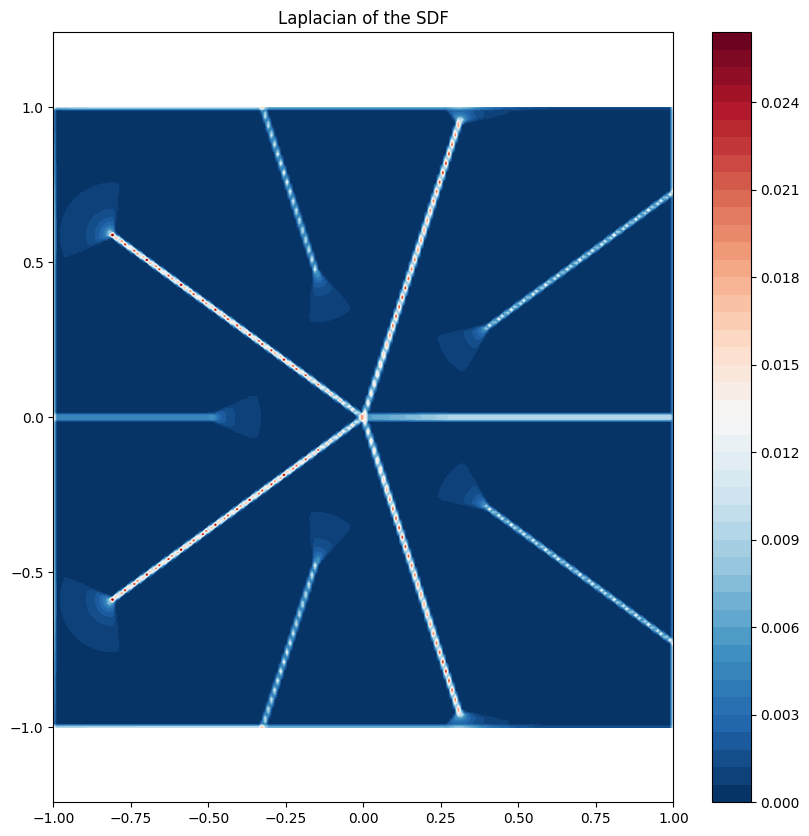

In [21]:
N = 200                         # grid resolution
x_vals = np.linspace(-1, 1, N)
y_vals = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x_vals, y_vals)
pts = np.stack([X.ravel(), Y.ravel()], axis=1)
pts_t = torch.tensor(pts, dtype=torch.float64)

with torch.no_grad():
    Z = SDF.distance_from_star_contour_vectorized(pts_t).numpy().reshape(N, N)
# plot laplace Z
from scipy.ndimage import laplace
Z_laplace = laplace(Z)
Z_abs = np.abs(Z_laplace)
plt.figure(figsize=(10, 10))
plt.title('Laplacian of the SDF')
plt.axis('equal')
plt.contourf(X, Y, Z_abs, levels=50, cmap='RdBu_r')
plt.colorbar()
plt.show()

In [13]:
#save models
for i, mdl in enumerate(model_list):
    #mdl_name = model_names[i].replace(" ", "_").replace("=", "").replace(",", "_") + ".pth"
    mdl_name = ".\\SIREN_circle_case9_models\\" + str(i) + ".pth"
    opt_name = ".\\SIREN_circle_case9_models\\opt_" + str(i) + ".pth"
    mod.save_model(mdl, mdl_name)
    torch.save(mdl.optimizer.state_dict(), opt_name)


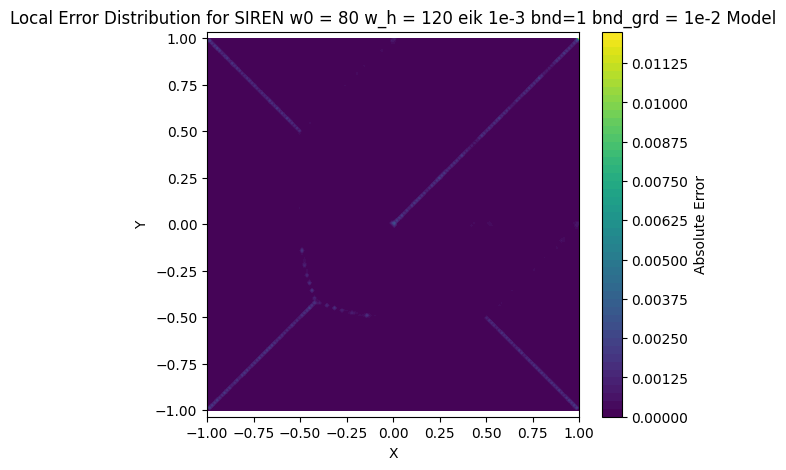

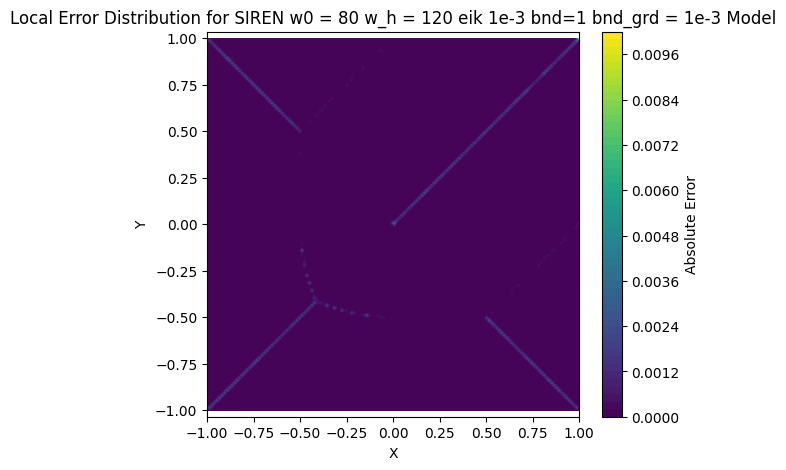

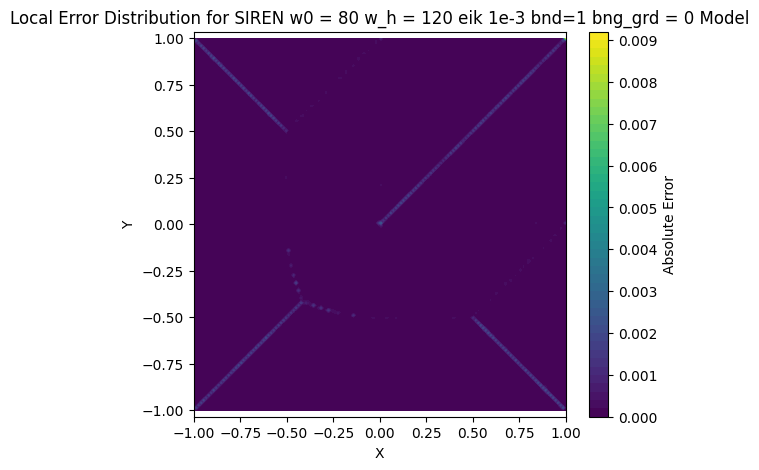

In [ ]:
for i in range(len(model_list)):
    model = model_list[i]
    name = model_names[i]
    x_vals = np.linspace(-1, 1, 150)
    y_vals = np.linspace(-1, 1, 150)
    X, Y = np.meshgrid(x_vals, y_vals)
    pts = torch.tensor(np.vstack([X.ravel(), Y.ravel()]).T, dtype=torch.float64)
    target = 1 - torch.sqrt(pts[:,0]**2 + pts[:,1]**2)
    #target = SDF.distance_from_line_vectorized(pts, angle=math.pi/6, offset=0.0)
    #target = SDF.distance_from_star_contour_vectorized(pts)
    target = SDF.distance_from_L_shape_vectorized(pts)
    with torch.no_grad():
        pred = model(pts)
        error = torch.abs(target.squeeze() - pred.squeeze()).cpu().numpy()
    #create scatter plot of pts colored by error
    plt.figure(figsize=(6, 5))
    #contourf
    sc = plt.contourf(X, Y, error.reshape(X.shape), levels=50,  cmap='viridis')
    #set to log scale for colorbar
    
    plt.colorbar(sc, label='Absolute Error')
    #zero level contour
    plt.contour(X, Y, error.reshape(X.shape), levels=[0], colors='r', linewidths=1)
    plt.title(f'Local Error Distribution for {name} Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.savefig(f'Error_Distribution_{name.replace(" ", "_").replace("=", "").replace(",", "_")}.png', dpi=300)
    plt.show()

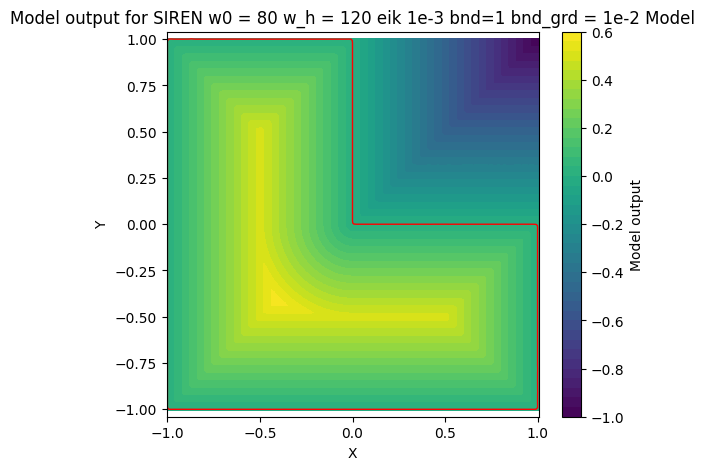

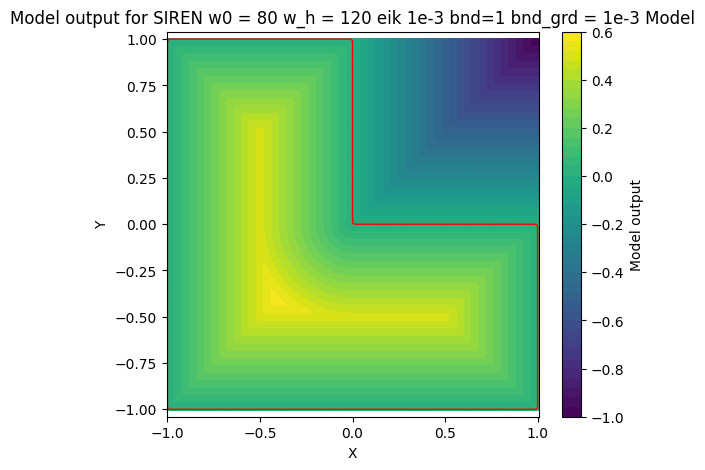

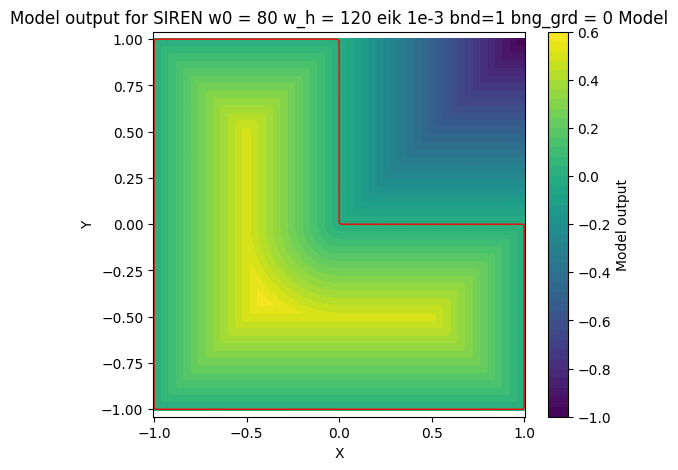

In [11]:
for i in range(len(model_list)):
    model = model_list[i]
    name = model_names[i]
    x_vals = np.linspace(-1.005, 1.005, 150)
    y_vals = np.linspace(-1.005, 1.005, 150)
    X, Y = np.meshgrid(x_vals, y_vals)
    pts = torch.tensor(np.vstack([X.ravel(), Y.ravel()]).T, dtype=torch.float64)
    #target = SDF.distance_from_line_vectorized(pts, angle=math.pi/6, offset=0.0)
    
    with torch.no_grad():
        pred = model(pts).squeeze().cpu().numpy()
    #create scatter plot of pts colored by error
    plt.figure(figsize=(6, 5))
    #contourf
    sc = plt.contourf(X, Y, pred.reshape(X.shape), levels=50,  cmap='viridis')
    #set to log scale for colorbar
    
    plt.colorbar(sc, label='Model output')
    #zero level contour
    plt.contour(X, Y, pred.reshape(X.shape), levels=[0], colors='r', linewidths=1)
    plt.title(f'Model output for {name} Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    #plt.savefig(f'Error_Distribution_{name.replace(" ", "_").replace("=", "").replace(",", "_")}.png', dpi=300)
    plt.show()

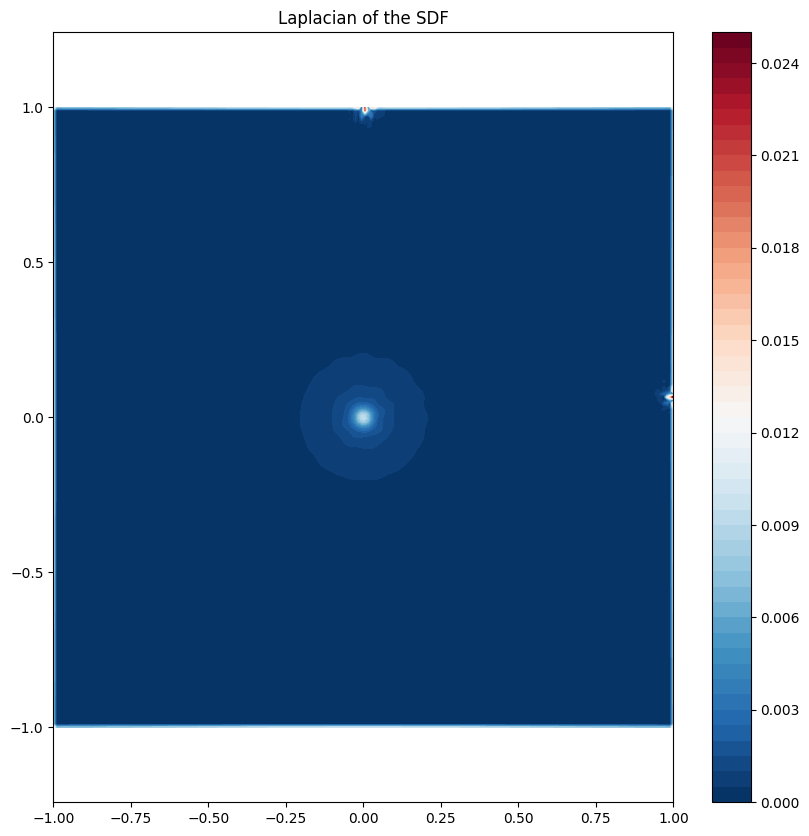

In [17]:
geom_vis.plot_laplacian_of_bspline_sdf(model_list[1])

In [22]:
architecture = [2,256,256,256,1]
model1 = mod.Siren(architecture, outermost_linear=True, first_omega_0=60, hidden_omega_0=120)
model2 = mod.Siren(architecture, outermost_linear=True, first_omega_0=60, hidden_omega_0=120)
model3 = mod.Siren(architecture, outermost_linear=True, first_omega_0=60, hidden_omega_0=120)
model4 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=80)
model5 = mod.Siren(architecture, outermost_linear=True, first_omega_0=100, hidden_omega_0=100)
model6 = mod.Siren(architecture, outermost_linear=True, first_omega_0=80, hidden_omega_0=120)

print(f"number of parameters: {sum(p.numel() for p in model1.parameters() if p.requires_grad)}")

model1.optimizer = torch.optim.Adam(lr=1e-5, params=model1.parameters())
model2.optimizer = torch.optim.Adam(lr=1e-5, params=model2.parameters())
model3.optimizer = torch.optim.Adam(lr=1e-5, params=model3.parameters())
model4.optimizer = torch.optim.Adam(lr=1e-5, params=model4.parameters())
model5.optimizer = torch.optim.Adam(lr=1e-5, params=model5.parameters())
model6.optimizer = torch.optim.Adam(lr=1e-5, params=model6.parameters())


model1.lr_scheduler = torch.optim.lr_scheduler.StepLR(model1.optimizer, step_size=1000, gamma=0.8)
model2.lr_scheduler = torch.optim.lr_scheduler.StepLR(model2.optimizer, step_size=1000, gamma=0.8)
model3.lr_scheduler = torch.optim.lr_scheduler.StepLR(model3.optimizer, step_size=1000, gamma=0.8)
model4.lr_scheduler = torch.optim.lr_scheduler.StepLR(model4.optimizer, step_size=1000, gamma=0.8)
model5.lr_scheduler = torch.optim.lr_scheduler.StepLR(model5.optimizer, step_size=1000, gamma=0.8)
model6.lr_scheduler = torch.optim.lr_scheduler.StepLR(model6.optimizer, step_size=1000, gamma=0.8)
print("Comparing different SIREN hyperparameters")
model_list = [model1, model2, model3]
eikonal_losses = [1e-3, 1e-3,1e-3,1e-2,1e-3]
bnd_coeffs = [0.0, 1, 0.0]
is_coeffs = [0, 0, 1]

model_names = [
    "SIREN w0 = 60 w_h = 120 eikon 1e-3",
    "SIREN w0 = 60 w_h = 120 eikon 1e-3 bnd 1" ,
    "SIREN w0 = 60 w_h = 120 eikon 1e-3 is 1",
    "SIREN w0 = 80 w_h = 80",
    "SIREN w0 = 100 w_h = 100",
    "SIREN w0 = 80 w_h = 120"
    ]

for i in range(len(model_list)):
    name = ".\\model\\" + str(i) + ".pth"
    model_list[i].load_state_dict(torch.load(name))
    model_list[i].eval()

number of parameters: 198401
Comparing different SIREN hyperparameters


C:\Users\csapo\AppData\Local\Temp\ipykernel_17800\2136452844.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_list[i].load_state_dict(torch.load(name))


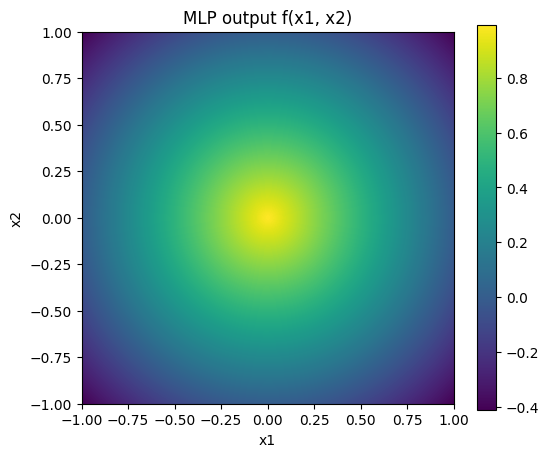

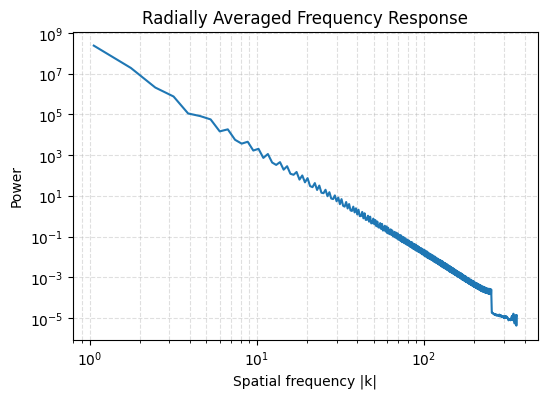

In [6]:
N = 1014                         # grid resolution
x_vals = np.linspace(-1, 1, N)
y_vals = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x_vals, y_vals)

pts = np.stack([X.ravel(), Y.ravel()], axis=1)
pts_t = torch.tensor(pts, dtype=torch.float64)

with torch.no_grad():
    Z = model3(pts_t).cpu().numpy().reshape(N, N)
    #rounded_star_cp = bsp_geom.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=5, degree=2)
    #L_shape = bsp_geom.create_L_shape_bspline_control_points(1)
    #Z = bsp_geom.bspline_signed_distance_vectorized(pts_t, rounded_star_cp, degree=2).numpy().reshape(N, N)
# ------------------------------------------------------------
# 3. Plot the output f(x)
# ------------------------------------------------------------
plt.figure(figsize=(6,5))
plt.imshow(Z, extent=[-1,1,-1,1], origin='lower')
plt.title("MLP output f(x1, x2)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

# ------------------------------------------------------------
# 4. Compute 2D FFT (frequency response)
# ------------------------------------------------------------
F = np.fft.fftshift(np.fft.fft2(Z))
power = np.abs(F)**2

# Frequency axes
freq_x = np.fft.fftshift(np.fft.fftfreq(N, d=(x_vals[1]-x_vals[0])))
freq_y = np.fft.fftshift(np.fft.fftfreq(N, d=(y_vals[1]-y_vals[0])))

FX, FY = np.meshgrid(freq_x, freq_y)
radial_freq = np.sqrt(FX**2 + FY**2).ravel()

# ------------------------------------------------------------
# 5. Radially averaged power spectrum
# ------------------------------------------------------------
nbins = N // 2
bins = np.linspace(0, radial_freq.max(), nbins+1)
radial_power = np.zeros(nbins)
counts = np.zeros(nbins)

bin_index = np.digitize(radial_freq, bins) - 1
flat_power = power.ravel()

for i, p in enumerate(flat_power):
    k = bin_index[i]
    if 0 <= k < nbins:
        radial_power[k] += p
        counts[k] += 1

radial_power /= np.maximum(1, counts)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# ------------------------------------------------------------
# 6. Plot frequency response
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.loglog(bin_centers[1:], radial_power[1:])
plt.title("Radially Averaged Frequency Response")
plt.xlabel("Spatial frequency |k|")
plt.ylabel("Power")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


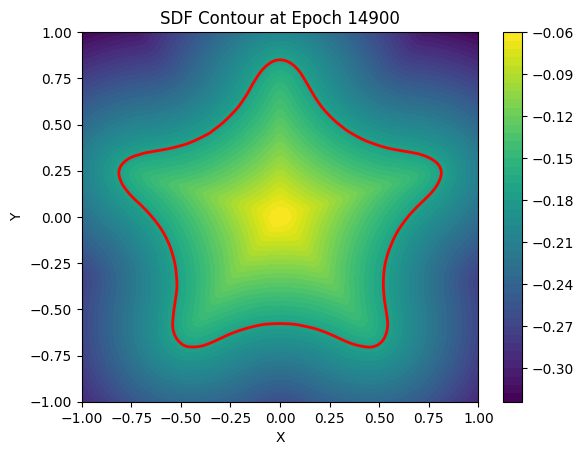

In [ ]:
NI.create_animation_SDF_contourf(model, interval=500, save_path="SDF_evolution_ReLU_cos_rnd_trg.gif", skip_initial_frames=0, adaptive_scaling=False, plot_cntr = True)

In [53]:
!ffmpeg -i error_anim_normal_sched_cos.gif -movflags faststart -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" error_anim_normal_sched_cos.mp4


ffmpeg version 8.0.1-full_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 15.2.0 (Rev8, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-lcms2 --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-libdvdnav --enable-libdvdread --enable-sdl2 --enable-libaribb24 --enable-libaribcaption --enable-libdav1d --enable-libdavs2 --enable-libopenjpeg --enable-libquirc --enable-libuavs3d --enable-libxevd --enable-libzvbi --enable-liboapv --enable-libqrencode --enable-librav1e --enable-libsvtav1 --enable-libvvenc --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxeve --enable-libxvid --enable-libaom --enable-libjxl --enable-libvpx --

MovieWriter imagemagick unavailable; using Pillow instead.


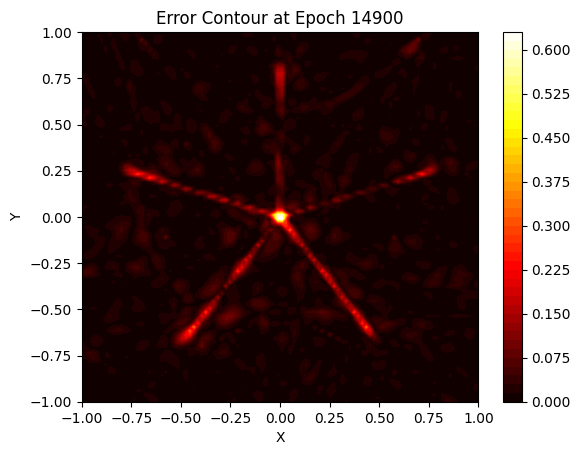

In [51]:
NI.create_animation_error_contourf(model, interval= 500,save_path="error_anim_ReLU_cos.gif",skip_initial_frames=0, adaptive_scaling=True, plot_cntr = False)

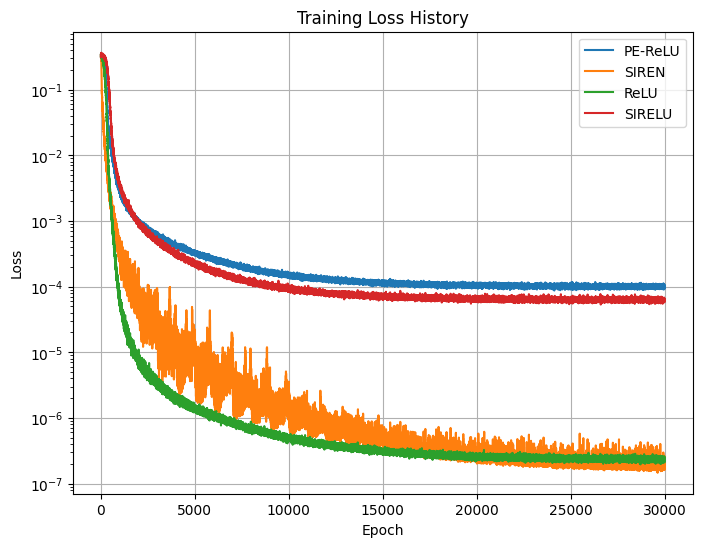

In [10]:
#plot loss history
plt.figure(figsize=(8, 6))
plt.plot(model2.loss_history)
plt.plot(model1.loss_history)
plt.plot(model3.loss_history)
plt.plot(model4.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss History")
plt.grid(True)
plt.yscale('log')
plt.legend(['PE-ReLU','SIREN','ReLU','SIRELU'])
plt.show()

In [6]:
model2.net

Sequential(
  (0): Linear(in_features=22, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=256, bias=True)
  (7): ReLU()
  (8): Linear(in_features=256, out_features=1, bias=True)
)

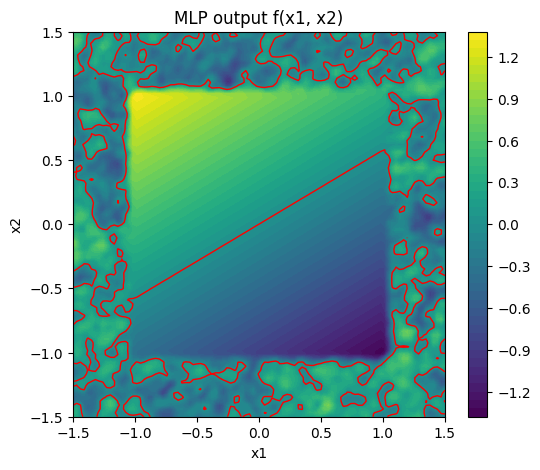

In [43]:
# plot model output 
N=100
x_vals = np.linspace(-1.5, 1.5, N)
y_vals = np.linspace(-1.5, 1.5, N)
X, Y = np.meshgrid(x_vals, y_vals)
Z = model1(torch.tensor(np.stack([X.ravel(), Y.ravel()], axis=1), dtype=torch.float64)).cpu().detach().numpy().reshape(N, N)
plt.figure(figsize=(6,5))
#plot contourf
plt.contourf(X, Y, Z, levels=50)
#plot zero level contour
plt.colorbar()
plt.contour(X, Y, Z, levels=[0], colors='r', linewidths=1)

plt.title("MLP output f(x1, x2)")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

In [23]:
#ALTERNATIVE contour error
DEGREE = 2
for mdl in model_list:
    print(mdl.name)
    #rounded_star_cp = geom_defs.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=5, degree=DEGREE)
    #pts = NI.generate_bspline_boundary_points(num_boundary_points=6000, case=3, data_gen_params={"num_star_points":5, "degree":2})
    pts = NI.generate_standard_boundary_points(num_boundary_points=6000, fun_num=5, data_gen_params={"angle":math.pi/6, "offset":0.0})
    with torch.no_grad():
        pred_sdf = mdl(pts).cpu().numpy()
    alt_bnd_mae = np.mean(np.abs(pred_sdf))
    print(f"Alternative boundary MAE: {alt_bnd_mae}")
    alt_bnd_max_err = np.max(np.abs(pred_sdf))
    print(f"Alternative boundary Max Error: {alt_bnd_max_err}")
    #GT 
    #gt_sdf = 1 - torch.sqrt(pts[:,0]**2 + pts[:,1]**2).numpy()
    #gt_bnd_mae = np.mean(np.abs(gt_sdf))
    #print(f"GT boundary MAE: {gt_bnd_mae}")
    #model error
    pts,target = NI.generate_data(10000, fun_num=5, device=torch.device("cpu"), data_gen_params={"angle":math.pi/6, "offset":0.0})
    with torch.no_grad():
        pred = mdl(pts)
        error = torch.abs(target.squeeze() - pred.squeeze())
        mae = torch.mean(error).item()
        max_err = torch.max(error).item()
    print(f"Model MAE: {mae}")
    print(f"Model Max Error: {max_err}")

SIREN
Alternative boundary MAE: 0.2940356456758252
Alternative boundary Max Error: 0.6312287268323565
Model MAE: 0.5145145699649168
Model Max Error: 1.9109546303961205
SIREN
Alternative boundary MAE: 0.26395648999815435
Alternative boundary Max Error: 0.6261304372162799
Model MAE: 0.5233204191617065
Model Max Error: 1.9403314252887696
SIREN
Alternative boundary MAE: 0.2811422437329685
Alternative boundary Max Error: 0.6294787786652764
Model MAE: 0.5189058948576121
Model Max Error: 1.9070241791590883


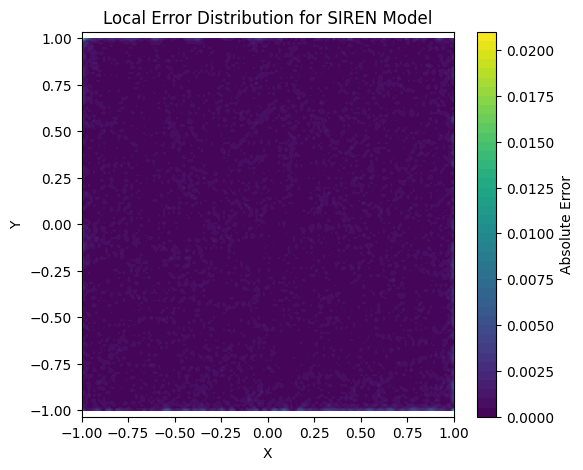

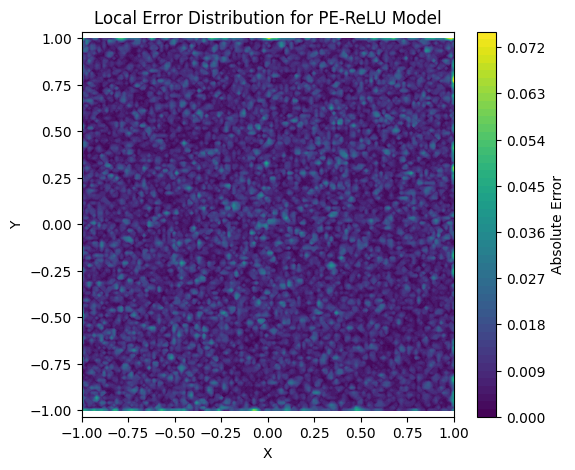

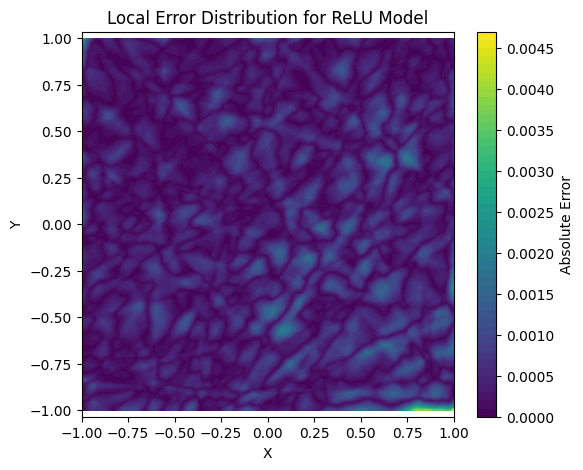

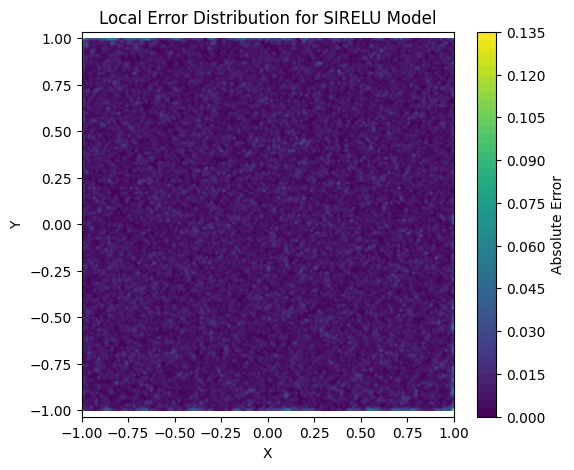

In [15]:
# plot local distribution of errors
model_list = [model1, model2, model3, model4]
model_names = ['SIREN', 'PE-ReLU', 'ReLU', 'SIRELU']
for i in range(len(model_list)):
    model = model_list[i]
    name = model_names[i]
    x_vals = np.linspace(-1, 1, 150)
    y_vals = np.linspace(-1, 1, 150)
    X, Y = np.meshgrid(x_vals, y_vals)
    pts = torch.tensor(np.vstack([X.ravel(), Y.ravel()]).T, dtype=torch.float64)
    #target = 1 - torch.sqrt(pts[:,0]**2 + pts[:,1]**2)
    target = SDF.distance_from_line_vectorized(pts, angle=math.pi/6, offset=0.0)
    
    with torch.no_grad():
        pred = model(pts)
        error = torch.abs(target.squeeze() - pred.squeeze()).cpu().numpy()
    #create scatter plot of pts colored by error
    plt.figure(figsize=(6, 5))
    #contourf
    sc = plt.contourf(X, Y, error.reshape(X.shape), levels=50,  cmap='viridis')
    #set to log scale for colorbar
    
    plt.colorbar(sc, label='Absolute Error')
    #zero level contour
    plt.contour(X, Y, error.reshape(X.shape), levels=[0], colors='r', linewidths=1)
    plt.title(f'Local Error Distribution for {name} Model')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')
    plt.show()

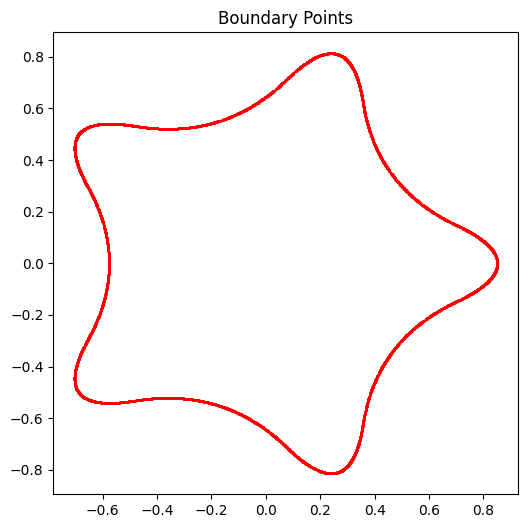

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pts[:,0].cpu().numpy(), pts[:,1].cpu().numpy(), 'ro', markersize=1)
ax.set_title("Boundary Points")
plt.show()

In [14]:
torch.save(model1.state_dict(), 'SIREN_198000_line_30deg_case3.pth')
torch.save(model2.state_dict(), 'PE_RELU_198000_line_30deg_case3.pth')
torch.save(model3.state_dict(), 'RELU_198000_line_30deg_case3.pth')

In [39]:
geom_vis.plot_laplacian_of_bspline_sdf(model=model1,num_samples=6000, control_points=rounded_star_cp, degree=DEGREE)

NameError: name 'rounded_star_cp' is not defined

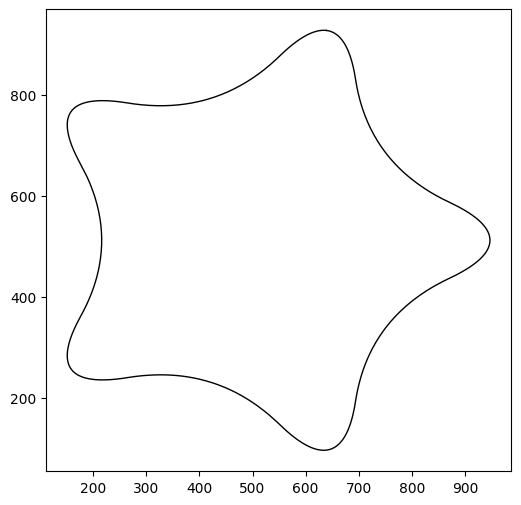

In [31]:
N = 1024                        # grid resolution
x_vals = np.linspace(-1, 1, N)
y_vals = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x_vals, y_vals)
pts = np.stack([X.ravel(), Y.ravel()], axis=1)
pts_t = torch.tensor(pts, dtype=torch.float64)

with torch.no_grad():
    Z = model2(pts_t).cpu().numpy().reshape(N, N)
    rounded_star_cp = geom_defs.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=5, degree=DEGREE)
    #L_shape = bsp_geom.create_L_shape_bspline_control_points(1)
    #Z2 = bsp_geom.bspline_signed_distance_vectorized(pts_t, rounded_star_cp, degree=DEGREE,num_curve_samples=6000).numpy().reshape(N, N)
contours = measure.find_contours(Z, level=0.0)
# convert to [-1,1,-1,1]
contours_red = contours
#contours2  = measure.find_contours(Z2, level=0.0)
fig, ax = plt.subplots(figsize=(6, 6))
#ax.contourf(X, Y, Z2, levels=50, cmap='RdBu_r')
for contour in contours:
    ax.plot(contour[:, 1] , contour[:,0] , 'k-', linewidth=1)
#for contour in contours2:
#    ax.plot(contour[:, 1] , contour[:,0] , 'r--', linewidth=1)
plt.show()

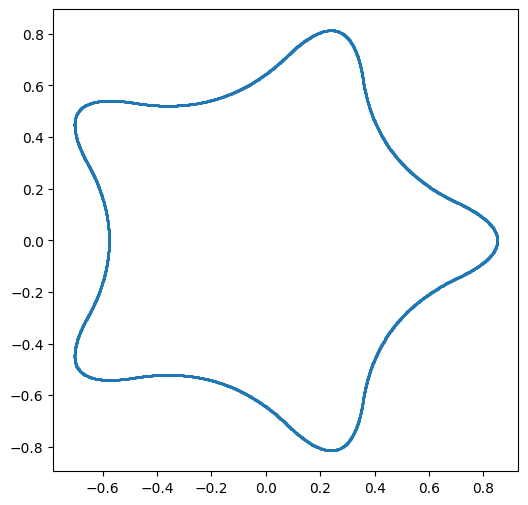

tensor(0.0773)


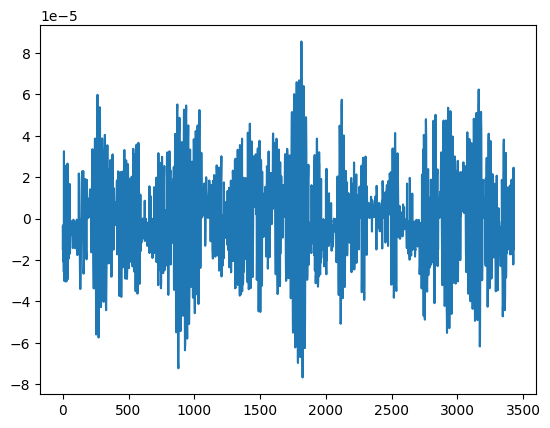

In [32]:
import geometry_definitions as geom_defs
rounded_star_cp = geom_defs.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=5, degree=DEGREE)
#convert contours to torch tensor
contours_t = torch.tensor(contours, dtype=torch.float64).reshape(-1,2)
contours_t = contours_t.flip(1)
#contourst2  = torch.tensor(contours2, dtype=torch.float64).reshape(-1,2)
#contourst2 = contourst2.flip(1)
contours_t = 2*(contours_t/(N-1))-1
# contourst2 = 2*(contourst2/(N-1))-1 
plt.figure(figsize=(6,6))
plt.scatter(contours_t[:,0],contours_t[:,1],s=1)
#plt.scatter(contourst2[:,0],contourst2[:,1],s=1)
plt.show()
#normalize contours_t to [-1,1]x[-1,1]
#print(contours_t)
contour_error = bsp_geom.bspline_signed_distance_vectorized(query_points=contours_t,control_points=rounded_star_cp, degree=DEGREE,num_curve_samples=6000,use_refinement=True)
#contourst2_error = bsp_geom.bspline_signed_distance_vectorized(query_points=contourst2,control_points=rounded_star_cp, degree=DEGREE,num_curve_samples=6000)
print(bsp_geom.bspline_signed_distance_vectorized(query_points=torch.tensor([-0.5,-0]),control_points=rounded_star_cp, degree=DEGREE,num_curve_samples=6000))
plt.plot(contour_error.numpy())
#plt.plot(contourst2_error.numpy())

In [11]:
print("PE_ReLU with 100000 steps 300 batch size, importance sampleing 0 sigma 0.01 MSE Error:")
contour_error_mae = torch.mean(torch.abs(contour_error))
print(f"Contour MAE: {contour_error_mae.item():.6f}")
contour_error_L2 = torch.mean(contour_error**2)
print(f"Contour L2 Error: {contour_error_L2.item()}")
contour_error_std = torch.std(contour_error)
print(f"Contour Error Std Dev: {contour_error_std.item():.6f}")
contour_error_max = torch.max(torch.abs(contour_error))
print(f"Contour Max Error: {contour_error_max.item():.6f}")
# model error
with torch.no_grad():
    pts, target = NI.generate_bspline_data(num_samples=5000, case=3, data_gen_params={"num_star_points":5, "degree":DEGREE},gt_num_curve_samples=6000)
    model_pred = model2(pts)
    model_error = torch.abs(model_pred - target)
    model_error_mae = torch.mean(model_error)
    model_error_L2 = torch.mean(model_error**2)
    model_error_std = torch.std(model_error)
    model_error_max = torch.max(model_error)
    print(f"Model MAE: {model_error_mae.item():.6f}")
    print(f"Model L2 Error: {model_error_L2.item()}")
    print(f"Model Error Std Dev: {model_error_std.item():.6f}")
    print(f"Model Max Error: {model_error_max.item():.6f}")

PE_ReLU with 100000 steps 300 batch size, importance sampleing 0 sigma 0.01 MSE Error:
Contour MAE: 0.000276
Contour L2 Error: 9.329717915638439e-08
Contour Error Std Dev: 0.000305
Contour Max Error: 0.000666
Model MAE: 0.000414
Model L2 Error: 2.823763468632663e-07
Model Error Std Dev: 0.000334
Model Max Error: 0.003856


In [12]:
contour_error_mae = torch.mean(torch.abs(contourst2_error))
print(f"Contour MAE: {contour_error_mae.item():.6f}")
contour_error_L2 = torch.mean(contourst2_error**2)
print(f"Contour L2 Error: {contour_error_L2.item():.6f}")
contour_error_std = torch.std(contourst2_error)
print(f"Contour Error Std Dev: {contour_error_std.item():.6f}")
contour_error_max = torch.max(torch.abs(contourst2_error))
print(f"Contour Max Error: {contour_error_max.item():.6f}")

NameError: name 'contourst2_error' is not defined

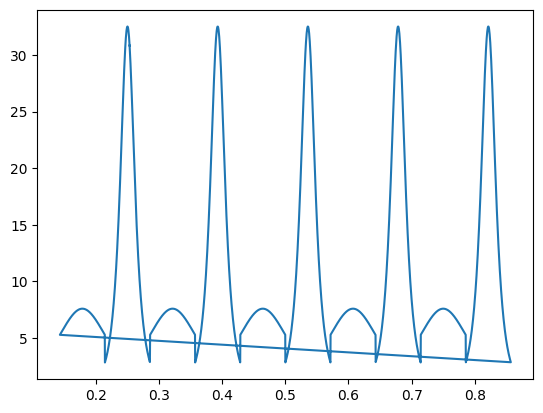

In [33]:
# plot curvature of B-spline curve at parameter values t.
t_values_conv = contours_t#.squeeze(0) # dummy conversion, replace with actual parameter values if available
#replacing x and y in t_values_conv

t_values = []

for i in range(t_values_conv.shape[0]):
    t_val = bsp_geom.find_closest_point_on_bspline_curve(query_point=t_values_conv[i], control_points=rounded_star_cp, degree=DEGREE, num_curve_samples=6000)
    t_values.append(t_val)
t_values = torch.tensor(t_values, dtype=torch.float64)

knots = bsp_geom.create_knot_vector(len(rounded_star_cp), degree=DEGREE, closed=True)
curvatures = bsp_geom.bspline_curvature(t_values, rounded_star_cp,knots=knots, degree=DEGREE)
plt.plot(t_values.numpy(),curvatures.numpy())

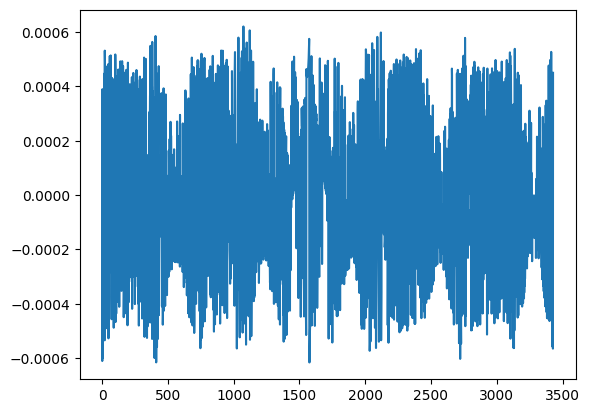

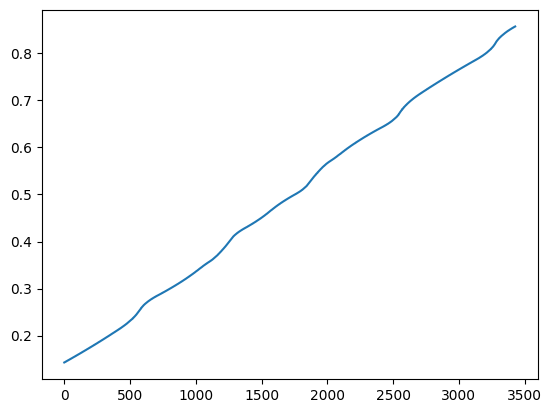

In [78]:
# GT
t_values_2 = contourst2
t_values2 = []
for i in range(t_values_2.shape[0]):
    t_val2 = bsp_geom.find_closest_point_on_bspline_curve(query_point=t_values_2[i], control_points=rounded_star_cp, degree=DEGREE, num_curve_samples=6000)
    t_values2.append(t_val2)
t_values2 = torch.tensor(t_values2, dtype=torch.float64)

t_values_sorted_2, indices = torch.sort(t_values2)
contour_error_sorted2 = contourst2_error[indices]
curvatures_2 = bsp_geom.bspline_curvature(t_values_sorted_2, rounded_star_cp,knots=knots, degree=DEGREE)
plt.plot(contour_error_sorted2.numpy())
plt.show()
plt.plot(t_values_sorted_2.numpy())
plt.show()


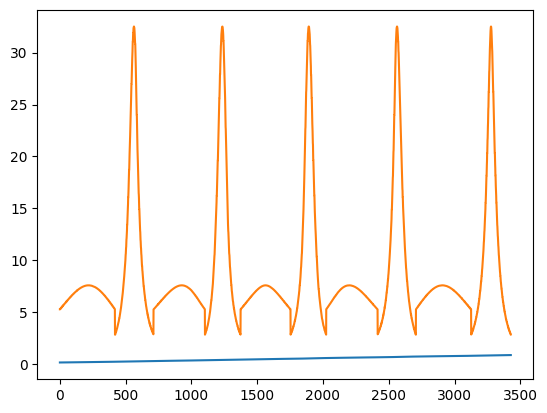

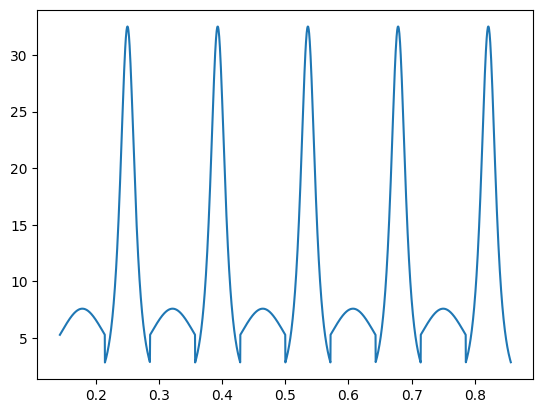

In [34]:


t_values_sorted, indices = torch.sort(t_values)
curvatures_sorted = curvatures[indices]
contour_error_sorted = contour_error[indices]
plt.plot(t_values_sorted.numpy())
plt.plot(curvatures_sorted.numpy())
plt.figure()
plt.plot(t_values_sorted.numpy(), curvatures_sorted.numpy())

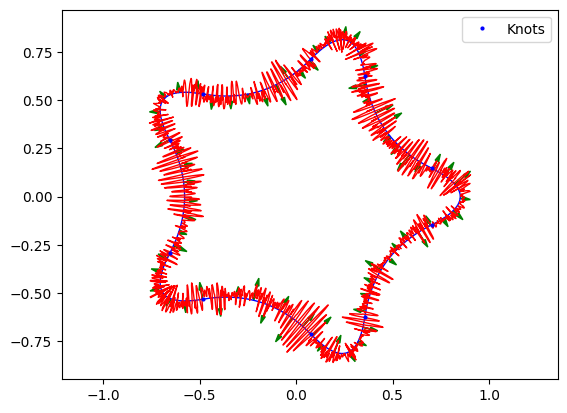

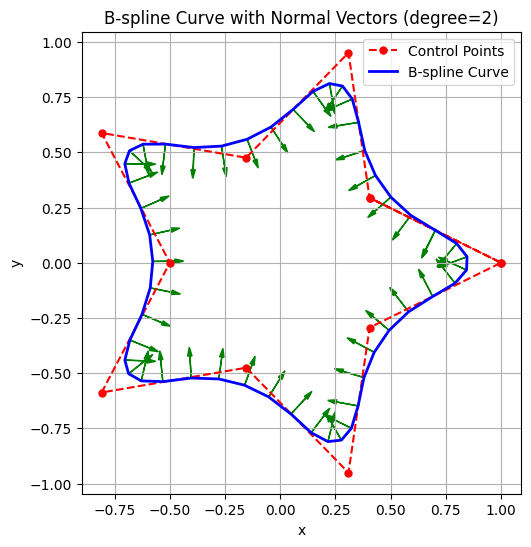

In [36]:
# plot curvature onto the contour plot
# ------------------------------------------------------------

fig, ax = plt.subplots()
#ax.contourf(X, Y, Z, levels=50, cmap='RdBu_r')
magnitude = 2000

normal_vec = bsp_geom.bspline_normalvectors(t=t_values, control_points=rounded_star_cp,knots=bsp_geom.create_knot_vector(rounded_star_cp.shape[0], degree=DEGREE, closed=True), degree=DEGREE)
new_point = np.zeros_like(contours_t.numpy())

tmp = bsp_geom.evaluate_bspline_curve_vectorized(t_values, rounded_star_cp, bsp_geom.create_knot_vector(rounded_star_cp.shape[0], degree=DEGREE, closed=True), degree=DEGREE)
ax.plot(tmp[:,0] , tmp[:,1] , 'b-',  linewidth=1)

for i in range(len(contours_t)):
    new_point[i] = tmp[i] + normal_vec[i].numpy()*magnitude*contour_error[i].numpy()
    if i % 50 == 0:
        start = tmp[i].numpy()
        err = contour_error[i].numpy()
        ax.arrow(start[0], start[1], normal_vec[i, 0].numpy()*err*magnitude, normal_vec[i, 1].numpy()*err*magnitude,
                  head_width=0.02, head_length=0.04, fc='g', ec='g')
               
ax.plot(new_point[:,0] , new_point[:,1] , 'r-',  linewidth=1)
#also mark the knots
knots = bsp_geom.create_knot_vector(len(rounded_star_cp), degree=DEGREE, closed=True)
knot_points = bsp_geom.evaluate_bspline_curve_vectorized(knots, rounded_star_cp, knots, degree=DEGREE)[DEGREE:-DEGREE-1]
ax.plot(knot_points[:,0], knot_points[:,1], 'bo', markersize=2, label='Knots')
ax.legend()
ax.axis('equal')
geom_vis.plot_normal_vectors_on_bspline(rounded_star_cp, degree=DEGREE, num_vectors=50, vector_length=0.1)
    



plt.show()



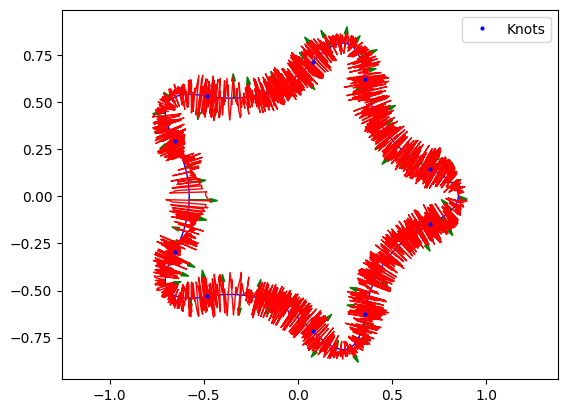

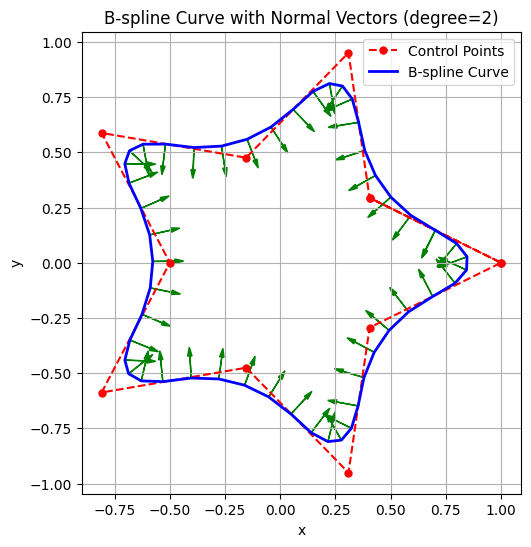

In [77]:
# plot GT ERROR
# ------------------------------------------------------------

fig, ax = plt.subplots()
#ax.contourf(X, Y, Z, levels=50, cmap='RdBu_r')
magnitude = 200

normal_vec = bsp_geom.bspline_normalvectors(t=t_values2, control_points=rounded_star_cp,knots=bsp_geom.create_knot_vector(rounded_star_cp.shape[0], degree=DEGREE, closed=True), degree=DEGREE)
new_point = np.zeros_like(contourst2.numpy())

tmp = bsp_geom.evaluate_bspline_curve_vectorized(t_values2, rounded_star_cp, bsp_geom.create_knot_vector(rounded_star_cp.shape[0], degree=DEGREE, closed=True), degree=DEGREE)
ax.plot(tmp[:,0] , tmp[:,1] , 'b-',  linewidth=1)

for i in range(len(contourst2)):
    new_point[i] = tmp[i] + normal_vec[i].numpy()*magnitude*contourst2_error[i].numpy()
    if i % 50 == 0:
        start = tmp[i].numpy()
        err = contourst2_error[i].numpy()
        ax.arrow(start[0], start[1], normal_vec[i, 0].numpy()*err*magnitude, normal_vec[i, 1].numpy()*err*magnitude,
                  head_width=0.02, head_length=0.04, fc='g', ec='g')
               
ax.plot(new_point[:,0] , new_point[:,1] , 'r-',  linewidth=1)
#also mark the knots
knots = bsp_geom.create_knot_vector(len(rounded_star_cp), degree=DEGREE, closed=True)
knot_points = bsp_geom.evaluate_bspline_curve_vectorized(knots, rounded_star_cp, knots, degree=DEGREE)[DEGREE:-DEGREE-1]
ax.plot(knot_points[:,0], knot_points[:,1], 'bo', markersize=2, label='Knots')
ax.legend()
ax.axis('equal')
geom_vis.plot_normal_vectors_on_bspline(rounded_star_cp, degree=DEGREE, num_vectors=50, vector_length=0.1)
    



plt.show()



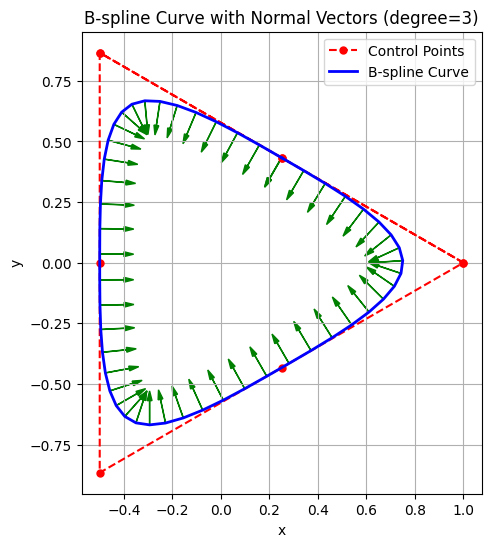

In [126]:
#experimental bspline shapes
cntr_pts = geom_defs.create_star_bspline_control_points(center=(0, 0), outer_radius=1.0, inner_radius=0.5, num_star_points=3, degree=3)
geom_vis.plot_normal_vectors_on_bspline(cntr_pts, degree=3, num_vectors=50, vector_length=0.1)

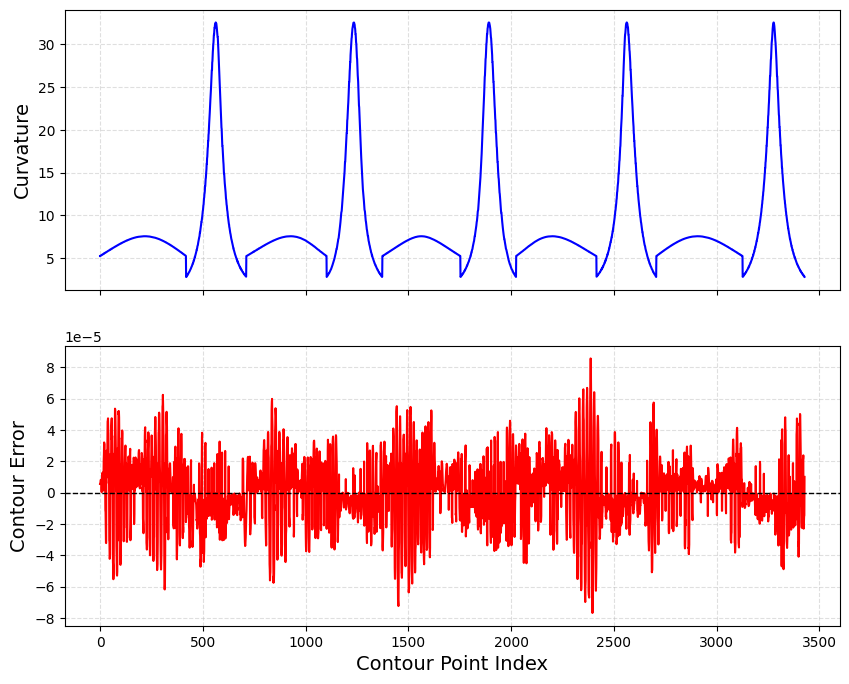

In [37]:
#plot curvature and contour error together below eachother
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax1.plot(curvatures_sorted.numpy(), color='blue')
ax1.set_ylabel('Curvature', fontsize=14)
ax2.plot(contour_error_sorted.numpy(), color='red')
ax1.grid(True, which="both", linestyle="--", alpha=0.4)
#also plot a horizontal line at y=0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_ylabel('Contour Error', fontsize=14)
ax2.set_xlabel('Contour Point Index', fontsize=14)
ax2.grid(True, which="both", linestyle="--", alpha=0.4)


NameError: name 'curvatures_2' is not defined

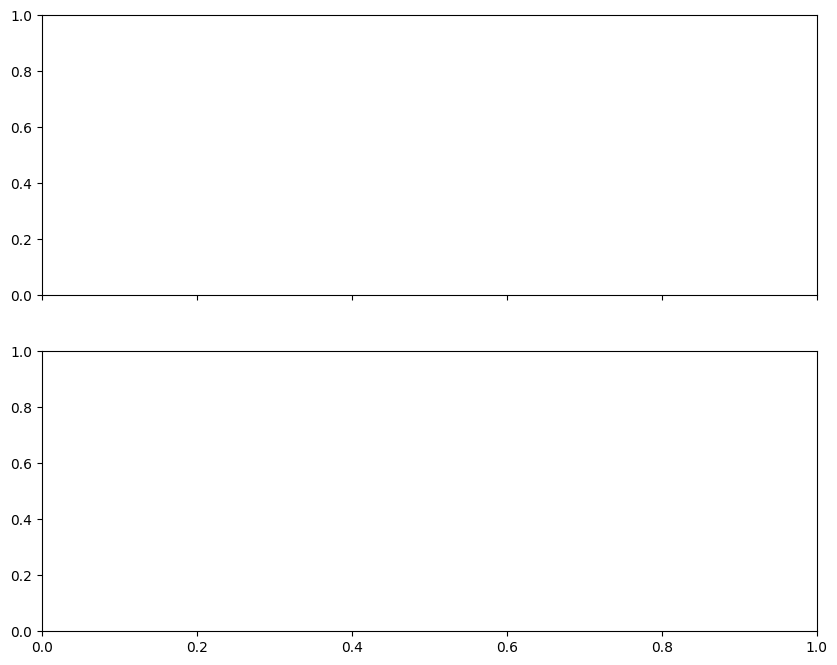

In [15]:
#GT
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax1.plot(curvatures_2.numpy(), color='blue')
ax1.set_ylabel('Curvature', fontsize=14)
ax2.plot(contour_error_sorted2.numpy(), color='red')
ax1.grid(True, which="both", linestyle="--", alpha=0.4)
#also plot a horizontal line at y=0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.set_ylabel('Contour Error', fontsize=14)
ax2.set_xlabel('Contour Point Index', fontsize=14)
ax2.grid(True, which="both", linestyle="--", alpha=0.4)


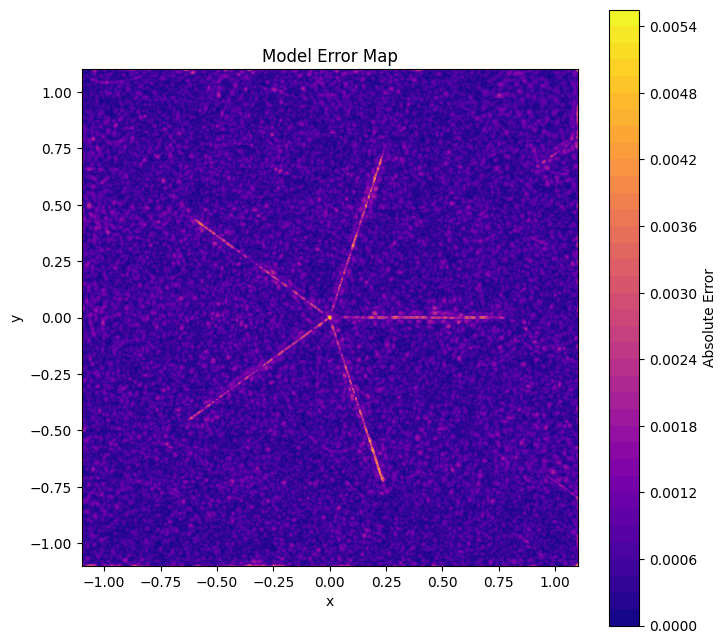

In [17]:
#plot_model_error_heatmap
geom_vis.plot_model_error_map(model2, rounded_star_cp, degree=DEGREE, N=500, use_log=False,num_curve_samples=6000)

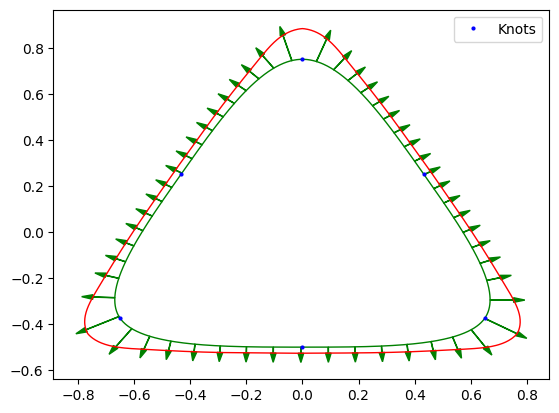

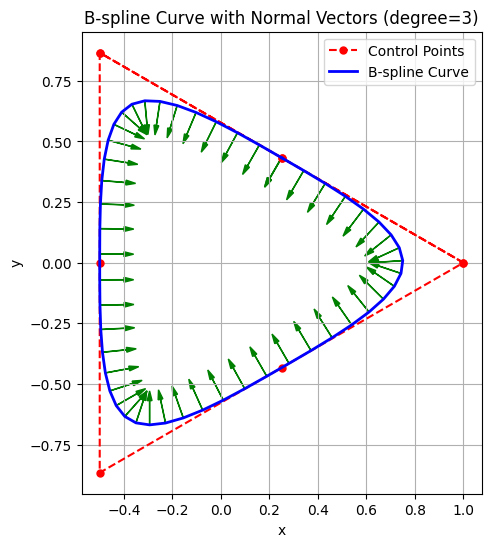

In [23]:
# plot curvature onto the contour plot
# ------------------------------------------------------------

fig, ax = plt.subplots()
#ax.contourf(X, Y, Z, levels=50, cmap='RdBu_r')
magnitude = 0.01

normal_vec = bsp_geom.bspline_normalvectors(t=t_values_sorted, control_points=rounded_star_cp,knots=bsp_geom.create_knot_vector(rounded_star_cp.shape[0], degree=3, closed=True), degree=3)
new_point = np.zeros_like(contours_t.numpy())

tmp = bsp_geom.evaluate_bspline_curve_vectorized(t_values_sorted, rounded_star_cp, bsp_geom.create_knot_vector(rounded_star_cp.shape[0], 3, closed=True), degree=3)
ax.plot(tmp[:,1] , tmp[:,0] , 'g-',  linewidth=1)

for i in range(len(contours_t)):
    err = curvatures_sorted[i].numpy()
    new_point[i] = tmp[i] - normal_vec[i].numpy()*magnitude*err
    if i % 50 == 0:
        start = tmp[i].numpy()
        ax.arrow(start[1], start[0], -normal_vec[i, 1].numpy()*err*magnitude, -normal_vec[i, 0].numpy()*err*magnitude,
                  head_width=0.02, head_length=0.04, fc='g', ec='g')
               
ax.plot(new_point[:,1] , new_point[:,0] , 'r-',  linewidth=1)

#also mark the knots
knots = bsp_geom.create_knot_vector(len(rounded_star_cp), degree=3, closed=True)
knot_points = bsp_geom.evaluate_bspline_curve_vectorized(knots, rounded_star_cp, knots, degree=3)[3:-3-1]
ax.plot(knot_points[:,1], knot_points[:,0], 'bo', markersize=2, label='Knots')
ax.legend()

geom_vis.plot_normal_vectors_on_bspline(rounded_star_cp, degree=3, num_vectors=50, vector_length=0.1)
    



plt.show()



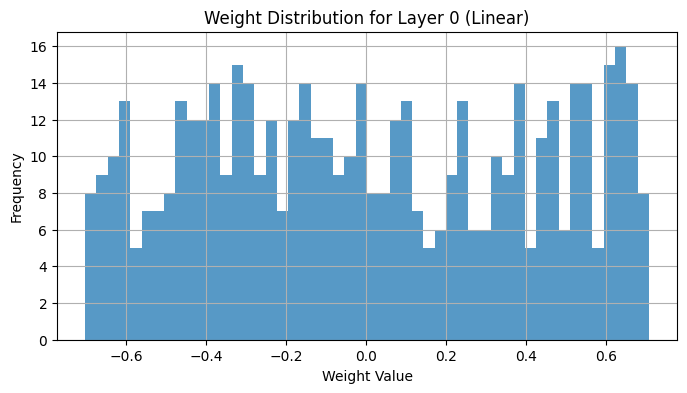

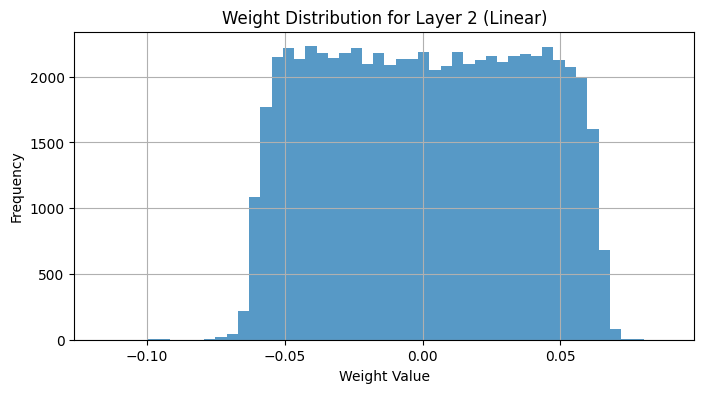

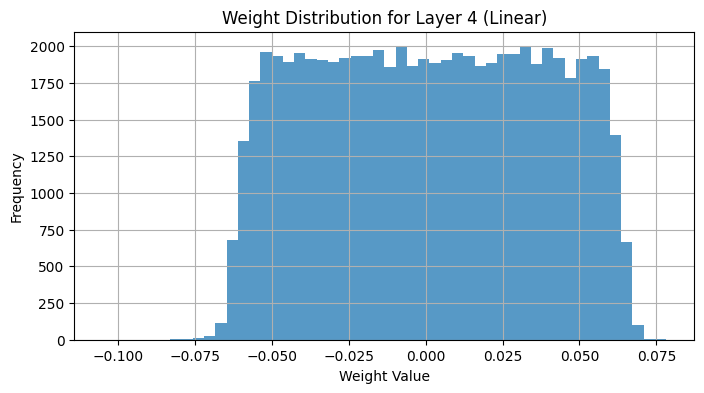

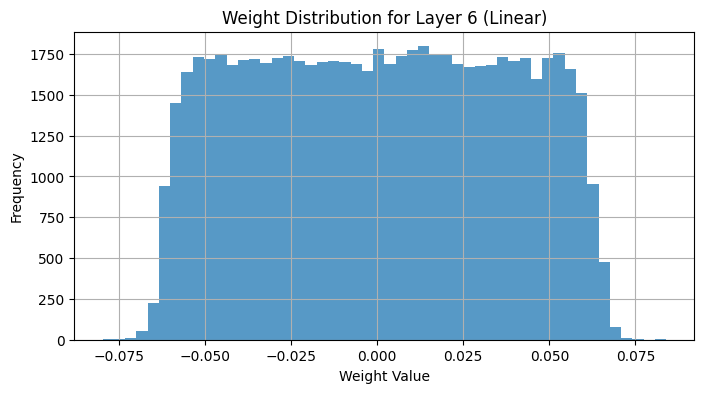

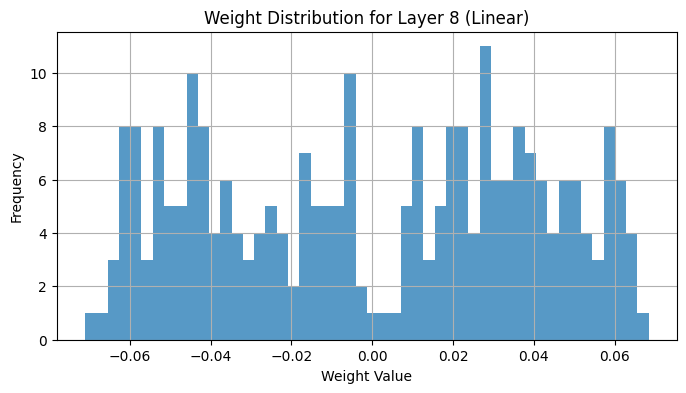

In [56]:
NI.plot_model_weight_per_layer_hyst(model3)

In [8]:
def train_model_old(model,num_epochs=10):
    report_interval = num_epochs // 10
    criterion = nn.MSELoss()
    cntrl_pts = bsp_geom.create_polygon_bspline_control_points(5,degree=1)
    knots = bsp_geom.create_knot_vector(len(cntrl_pts), degree=1)
    for epoch in range(num_epochs):
        pts = torch.randn((500,2))*2-1
        #pts = pts.clone().detach().requires_grad_(True)
        pred = model(pts)
        target = bsp_geom.bspline_signed_distance_vectorized(pts,cntrl_pts,degree=1)
        loss_sdf = criterion(pred.squeeze(), target)
        loss = loss_sdf
        model.optimizer.zero_grad()
        loss.backward()
        model.optimizer.step()
        #model.lr_scheduler.step()
        model.loss_history.append(loss.item())
        if epoch % report_interval == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
train_model_old(model,100)

Epoch 0, Loss: 4.556866
Epoch 10, Loss: 3.761360
Epoch 20, Loss: 3.181367
Epoch 30, Loss: 2.467447
Epoch 40, Loss: 2.155694
Epoch 50, Loss: 2.265133
Epoch 60, Loss: 1.921426
Epoch 70, Loss: 1.436932
Epoch 80, Loss: 1.295657
Epoch 90, Loss: 1.372169
